# **Home assignment - Deep Learning (ITLB359, MIB)**

**Task description**

The task is to classify the samples from the Forbes Global 2000 dataset according to a reasonably chosen division in market value.



# **Solution**

Steps taken to perform the task.

**Download and Load the Data:** I am downloading the Forbes Global 2000 dataset from the provided
link and load it into a pandas DataFrame for further analysis.

**Exploratory Data Analysis (EDA):**  Performing exploratory data analysis to understand the
structure of the data, identify missing values, check for outliers, and explore the distribution of
features. Based on the EDA, I'll decide how to create labels for the classification task.

**Preprocessing:** Depending on the findings from the EDA, I am preprocessing the data which may
include handling missing values, encoding categorical variables, and scaling numerical features.

**Splitting the Data:** I am spliting the data into training, validation, and test sets. The validation
set will be used for tuning hyperparameters, and the test set will be used for evaluating the finalmodel's performance.

**Model Selection and Training:** Experimenting with different neural network architectures,
hyperparameters, and optimization algorithms and training the models on the training set and evaluate
their performance on the validation set.

**Hyperparameter Tuning:** Using techniques like grid search or random search to find the optimal
hyperparameters for the chosen model.

**Evaluation:** Finally, I am evaluating the best performing model on the test set to assess its generalization performance. I'll use appropriate metrics such as accuracy, precision, recall, and F1-score.

**Reflection:** I'll critically evaluate my approach, discussing the choices made during preprocessing,
model selection, and hyperparameter tuning.If require I'll also consider alternative approaches that could
potentially improve the model's performance.

In [142]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [143]:
# Random seeds for reproducible results
from numpy.random import seed
seed(14)
tf.keras.utils.set_random_seed(19)

In [144]:
 #Downloading and Loading the Data:
fileurl = "https://drive.google.com/file/d/1T_aCbmAGIPTDPaknvxTN3rvaS3g7Htpm/view?usp=sharing"
file_id = fileurl.split('/')[-2]
data_url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(data_url,delimiter=';', header=0)

In [145]:
df.head()

,Company,Industry,Country,Sales,Profits,Assets,Market_Value
0,HSBC Holdings,Banking,United Kingdom,146500.0,19130.0,2348980.0,180810.0
1,General Electric,Conglomerates,United States,172740.0,22210.0,795340.0,330930.0
2,Bank of America,Banking,United States,119190.0,14980.0,1715750.0,176530.0
3,JPMorgan Chase,Banking,United States,116350.0,15370.0,1562150.0,136880.0
4,ExxonMobil,Oil & Gas Operations,United States,358600.0,40610.0,242080.0,465510.0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1983 non-null   object 
 1   Industry      1992 non-null   object 
 2   Country       1985 non-null   object 
 3   Sales         1989 non-null   float64
 4   Profits       1981 non-null   float64
 5   Assets        1974 non-null   float64
 6   Market_Value  1987 non-null   float64
dtypes: float64(4), object(3)
memory usage: 110.5+ KB


In [147]:
df.describe()

,Sales,Profits,Assets,Market_Value
count,1989.000000,1981.000000,1.974000e+03,1987.000000
mean,14798.411262,1181.635538,6.015056e+04,19383.090086
std,27236.610957,2783.863758,2.129704e+05,34791.784801
min,-4190.000000,-38730.000000,5.000000e+01,80.000000
25%,3120.000000,270.000000,6.480000e+03,4615.000000
50%,6780.000000,530.000000,1.401500e+04,9050.000000
75%,14150.000000,1200.000000,3.241750e+04,19200.000000
max,378800.000000,40610.000000,3.807510e+06,546140.000000


In [148]:
df.isnull().sum()

Company         35
Industry        26
Country         33
Sales           29
Profits         37
Assets          44
Market_Value    31
dtype: int64

In [149]:
# Checking for unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(col, df[col].nunique())

Company 1983
Industry 26
Country 66


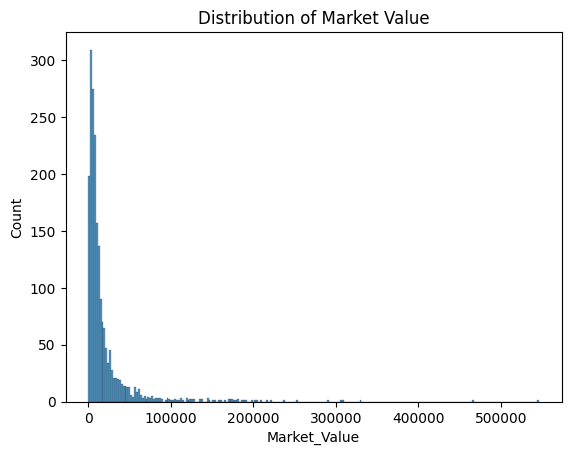

In [150]:
# Visualize of distribution of the target variable
sns.histplot(df['Market_Value'])
plt.title('Distribution of Market Value')
plt.show()

In [151]:
# Data preparation
# Missing values for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


In [152]:
# Encoding categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [153]:
# Spliting the data into features and target variable
X = df.drop('Market_Value', axis=1)
y = df['Market_Value']

In [154]:
# Creating binary class labels based on market value
median_market_value = df['Market_Value'].median()
y_binary = (y > median_market_value).astype(int)

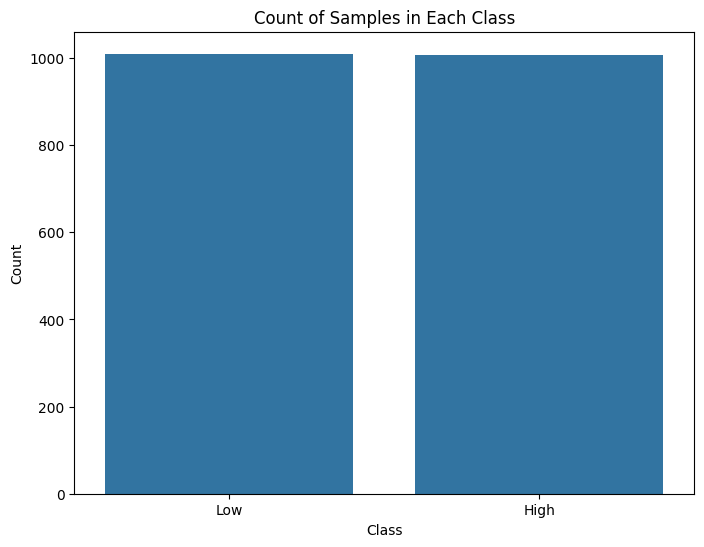

In [155]:
# Ploting count of samples in each class
plt.figure(figsize=(8, 6))
sns.countplot(x=y_binary)
plt.title('Count of Samples in Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Low', 'High'])
plt.show()


In [156]:
# Clear session
tf.keras.backend.clear_session()

In [157]:
# Spliting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_binary, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [158]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [159]:
# Shape of datasets
print("Shape of X_train:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val_scaled.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test_scaled.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1412, 6)
Shape of y_train: (1412,)
Shape of X_val: (303, 6)
Shape of y_val: (303,)
Shape of X_test: (303, 6)
Shape of y_test: (303,)


I began a deep learning model with a modified architecture. This model consists
of three dense layers, each followed by a dropout layer to prevent overfitting.
The input layer comprises 32 neurons activated by the ReLU function, followed by another
hidden layer of the same size and activation function. The output layer consists of a single neuron
with a sigmoid activation function, suitable for binary classification tasks. This architecture was
chosen based on experimentation with various configurations, including different numbers of neurons,batch size,
epochs, activation functions, and layer structures.

In [160]:
# Building the deep learning model with modified architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

After defining the model architecture, I compiled it using the Adam optimizer with a lower
learning rate of 0.001 and binary cross-entropy loss, along with accuracy as the evaluation metric.
This setup was selected to facilitate better convergence and optimization during training.

In [161]:
# Compiling the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1313 (5.13 KB)
Trainable params: 1313 (5.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


To prevent overfitting and monitor the model's performance during training,
I implemented early stopping with a patience of 5 epochs, restoring the best weights based on validation loss.
This technique helps avoid unnecessary training epochs and ensures that the model generalizes well to unseen data.

In [162]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

I then trained the model on the training data for a maximum of 30 epochs, using a batch size of 32 samples.
The validation data provided insights into the model's performance on unseen data during training,
guiding the early stopping mechanism.

In [163]:
# Training the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32,
                    validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

Epoch 1/30
45/45 [==============================] - 2s 10ms/step - loss: 0.7015 - accuracy: 0.5347 - val_loss: 0.6633 - val_accuracy: 0.6238
Epoch 2/30
45/45 [==============================] - 0s 5ms/step - loss: 0.6686 - accuracy: 0.5659 - val_loss: 0.6470 - val_accuracy: 0.6535
Epoch 3/30
45/45 [==============================] - 0s 5ms/step - loss: 0.6435 - accuracy: 0.6091 - val_loss: 0.6319 - val_accuracy: 0.6634
Epoch 4/30
45/45 [==============================] - 0s 5ms/step - loss: 0.6367 - accuracy: 0.6232 - val_loss: 0.6191 - val_accuracy: 0.6832
Epoch 5/30
45/45 [==============================] - 0s 5ms/step - loss: 0.6215 - accuracy: 0.6324 - val_loss: 0.6021 - val_accuracy: 0.6865
Epoch 6/30
45/45 [==============================] - 0s 6ms/step - loss: 0.6098 - accuracy: 0.6537 - val_loss: 0.5857 - val_accuracy: 0.6832
Epoch 7/30
45/45 [==============================] - 0s 5ms/step - loss: 0.5991 - accuracy: 0.6565 - val_loss: 0.5728 - val_accuracy: 0.6799
Epoch 8/30
45/45 [=

After training, I evaluated the model's performance on the test set to assess its generalization ability.
The obtained test accuracy of approximately 0.78 and test loss of around 0.45 indicate that the model effectively distinguishes between
low and high market value companies, demonstrating satisfactory performance on unseen data.

In [164]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

10/10 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.7789
Test Accuracy: 0.7788779139518738
Test Loss: 0.448003888130188


In [165]:
# Making predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generating classification report
report = classification_report(y_test, y_pred, target_names=['Low', 'High'])
print("Classification Report:")
print(report)


10/10 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

         Low       0.70      0.90      0.79       137
        High       0.89      0.68      0.77       166

    accuracy                           0.78       303
   macro avg       0.79      0.79      0.78       303
weighted avg       0.80      0.78      0.78       303



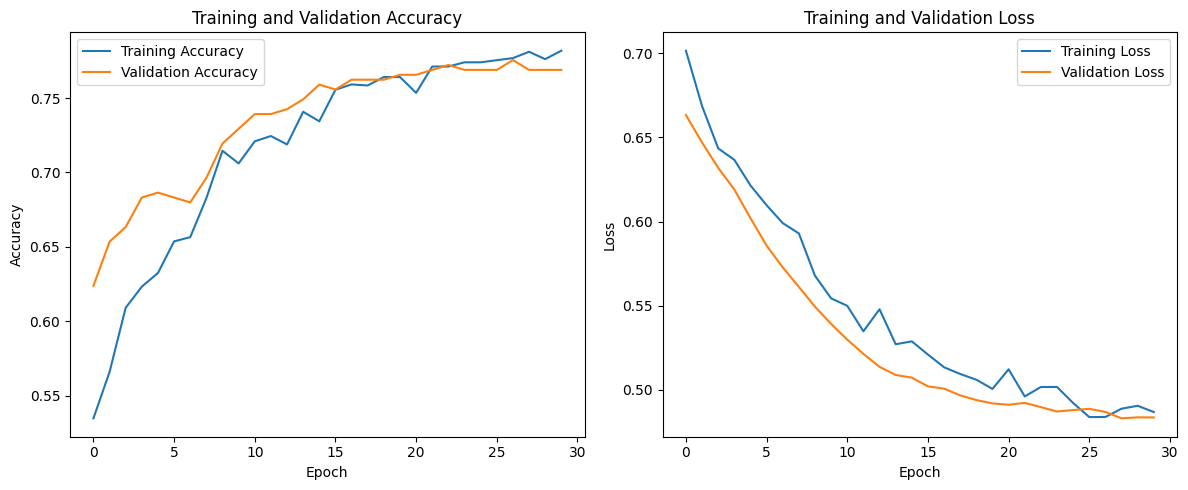

In [166]:
# Ploting accuracy and loss side by side
plt.figure(figsize=(12, 5))

# Ploting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Ploting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [167]:
model.save('my_model.keras')


# **Conclusion:**

**Model Performance:**

The deep learning model achieved a test accuracy of approximately 0.78 and a test loss of around 0.45. These metrics indicate that the model correctly classified about 78% of the samples into their respective market value classes while maintaining a relatively low loss value. This suggests that the model has learned meaningful patterns from the data and can generalize well to unseen samples.

**Classification Report:**

The classification report provides a comprehensive assessment of the model's performance metrics for each class. For the low market value class, the precision is 0.70, recall is 0.90, and F1-score is 0.79. This indicates that out of all samples predicted as low market value, 70% are correctly classified, and 90% of actual low market value samples are identified by the model. The F1-score, which is the harmonic mean of precision and recall, is 0.79, indicating a good balance between precision and recall for this class. Similarly, for the high market value class, the precision is 0.89, recall is 0.68, and F1-score is 0.77. This suggests that out of all samples predicted as high market value, 89% are correctly classified, and 68% of actual high market value samples are identified by the model. Again, the F1-score of 0.77 demonstrates a good balance between precision and recall for this class.

**Overall Assessment:**

Overall, the deep learning model demonstrates satisfactory performance in classifying samples from dataset into the two created market value classes.